## Logistic Regression in Python With scikit-learn: Example 1

In [125]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline 

In [126]:
# numpy.arange([start, ]stop, [step, ], dtype=None) -> numpy.ndarray
# np.int8: 8-bit signed integer (from -128 to 127)
# np.uint8: 8-bit unsigned integer (from 0 to 255)

# np.int16: 16-bit signed integer (from -32768 to 32767)
# np.uint16: 16-bit unsigned integer (from 0 to 65535)

# np.int32: 32-bit signed integer (from -2**31 to 2**31-1)
# np.uint32: 32-bit unsigned integer (from 0 to 2**32-1)

# np.int64: 64-bit signed integer (from -2**63 to 2**63-1)
# np.uint64: 64-bit unsigned integer (from 0 to 2**64-1)

# x = np.arange(5, dtype=np.int32)
# y = np.arange(5.0)
# y.dtype -> dtype('float64')
# y.itemsize  # In bytes: 8

# Generally, range is more suitable when you need to iterate using the Python for loop. 
# If you want to create a NumPy array, and apply fast loops under the hood, then arange() is a much better solution.

import timeit
n = 1
timeit.timeit(f'x = [i**2 for i in range({n})]')
timeit.timeit(f'x = np.arange({n})**2', setup='import numpy as np')


In [ ]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [127]:
# solver is a string ('liblinear' by default) that decides what solver to use for fitting the model. 
# Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.

# 'liblinear' solver doesn’t work without regularization.
# 'newton-cg', 'sag', 'saga', and 'lbfgs' don’t support L1 regularization.
# they all support L2 regularization.except 'saga'
# 'saga' is the only solver that supports elastic-net regularization.

# random_state is an integer, an instance of numpy.RandomState, or None (default) 
# that defines what pseudo-random number generator to use.

model = LogisticRegression(solver='liblinear', random_state=0)

In [128]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [129]:
# the attribute .classes_ represents the array of distinct values that y takes:
model.classes_

array([0, 1])

In [130]:
# You can also get the value of the slope 𝑏₁ and the intercept 𝑏₀ of the linear function 𝑓 
model.intercept_
model.coef_

array([[0.51491375]])

In [131]:
# returns the matrix of probabilities that the predicted output is equal to zero or one
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [132]:
 model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [133]:
# .score() takes the input and output as arguments and
# returns the ratio of the number of correct predictions to the number of observations.
model.score(x, y)

0.9

In [134]:
print(model.predict(x))
confusion_matrix(y, model.predict(x))

[0 0 0 1 1 1 1 1 1 1]


array([[3, 1],
       [0, 6]], dtype=int64)

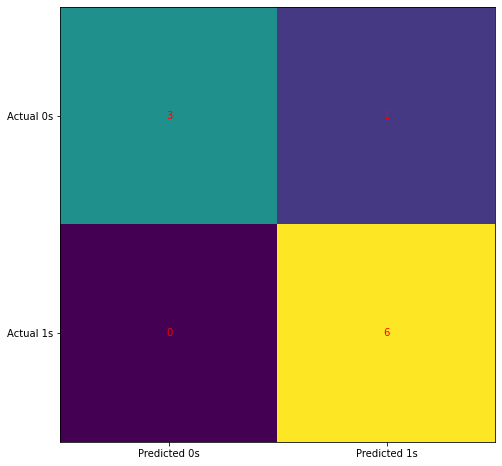

In [135]:
confusion_matrix = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(confusion_matrix)
ax.grid(False)

ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))

ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='red')
        
plt.show()

In [136]:
# You can get a more comprehensive report on the classification with
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



# Improve the Model


In [137]:
# You can improve your model by setting different parameters. 
# For example, let’s work with the regularization strength C equal to 10.0, instead of the default value of 1.0:
improved_model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
improved_model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [138]:
improved_model.intercept_
improved_model.coef_
improved_model.predict_proba(x)
improved_model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [139]:
print(improved_model.score(x, y))

1.0


In [142]:
y_pred = improved_model.predict(x)
print(y_pred)
confusion_matrix(y, improved_model.predict(x))

[0 0 0 0 1 1 1 1 1 1]


TypeError: 'numpy.ndarray' object is not callable

In [110]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



## Logistic Regression in Python With scikit-learn: Example 2

In [99]:
# Step 1: Import packages, functions, and classes
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Get data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

# Step 3: Create a model and train it
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

# Step 4: Evaluate the model
p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

# Unlike the previous one, this problem is not linearly separable. 
# That means you can’t find a value of 𝑥 and draw a straight line 
# to separate the observations with 𝑦=0 and those with 𝑦=1. 

print('x:', x, sep='\n')

print('y:', y, sep='\n', end='\n\n')

print('intercept:', model.intercept_)
print('coef:', model.coef_, end='\n\n')


print('p_pred:', p_pred, sep='\n', end='\n\n')
print('y_pred:', y_pred, end='\n\n')
print('score_:', score_, end='\n\n')


print('conf_m:', conf_m, sep='\n', end='\n\n')
print('report:', report, sep='\n')